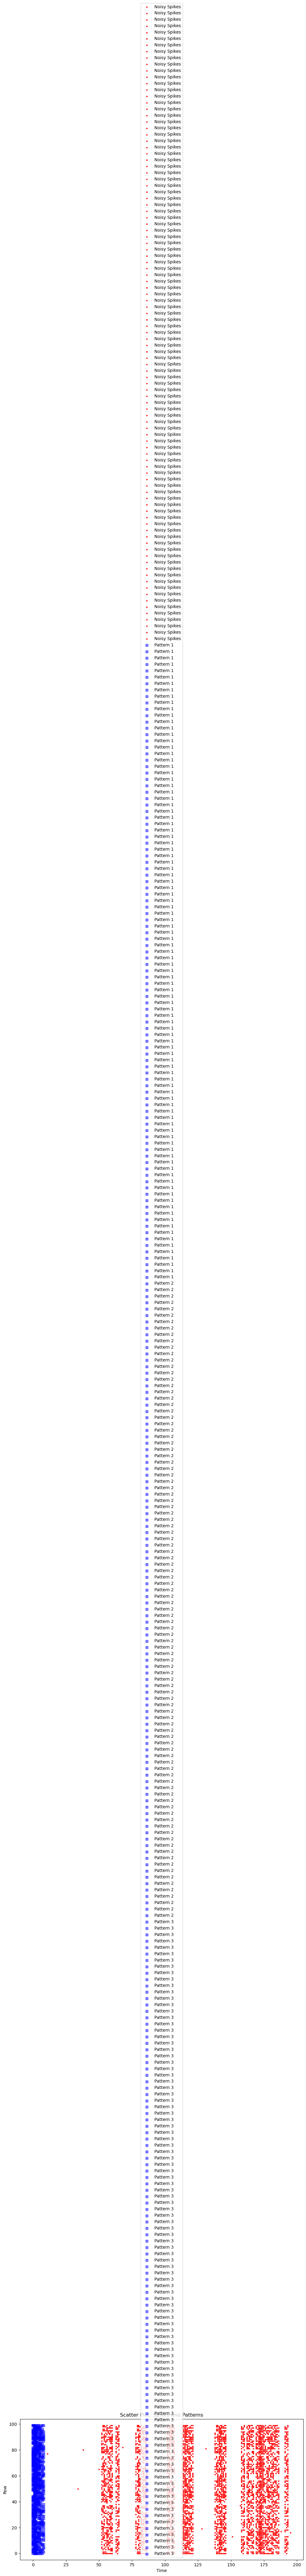

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(M, N, T, spikes_per_pattern, noisy_spikes, appearances_per_pattern):
    # Create patterns (binary matrices) - M patterns of varying sizes
    patterns = []
    for _ in range(M):
        D = np.random.randint(3, 10)  # Randomly choose a size for each pattern (D)
        pattern = np.random.randint(0, 2, size=(N, D))
        patterns.append(pattern)
    
    # Create an empty N by T image
    image = np.zeros((N, T), dtype=int)
    
    # Place spikes for each pattern
    for pattern_idx in range(M):
        for _ in range(appearances_per_pattern):
            row_idx = np.random.randint(0, N - patterns[pattern_idx].shape[0] + 1)
            col_idx = np.random.randint(0, T - patterns[pattern_idx].shape[1] + 1)
            image[row_idx:row_idx+patterns[pattern_idx].shape[0], col_idx:col_idx+patterns[pattern_idx].shape[1]] += patterns[pattern_idx]
    
    # Add noisy spikes
    for _ in range(noisy_spikes):
        row_idx = np.random.randint(0, N)
        col_idx = np.random.randint(0, T)
        image[row_idx, col_idx] = 1

    # Shuffle rows (optional)
    np.random.shuffle(image)

    return image, patterns



In [ ]:
# Generate synthetic data and get patterns
data, patterns = generate_synthetic_data(M, N, T, spikes_per_pattern, noisy_spikes, appearances_per_pattern)

# Threshold the data to make it binary
data_binary = (data > 0).astype(int)

# Create scatter plot for the binary data
plt.figure(figsize=(12, 6))

# Plot noisy spikes in red
for row_idx in range(N):
    noisy_spikes = np.where(data_binary[row_idx] == 1)[0]
    plt.scatter(noisy_spikes, [row_idx] * len(noisy_spikes), c='red', marker='o', label='Noisy Spikes', s=5)

# Plot patterns in blue
for idx, pattern in enumerate(patterns):
    for row_idx in range(N):
        pattern_spikes = np.where(pattern[row_idx] == 1)[0]
        plt.scatter(pattern_spikes, [row_idx] * len(pattern_spikes), c='blue', marker='s', label=f'Pattern {idx+1}', s=30, alpha=0.5)

plt.xlabel("Time")
plt.ylabel("Row")
plt.title("Scatter Plot: Spikes and Patterns")
plt.legend()
plt.show()